In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from utils.udp_util import extract_udp_prague_to_dataframe
from utils.plotter import  plot_siftr_graph

In [2]:
# File paths
file_cubic = '../data/udp_net_2025-06-02-16-26-36/iperf3_server_cubic_iperf3_d120.json'
file_cubic = '../data/udp_net_2025-06-02-16-26-36/iperf3_client_cubic_iperf3_d120.json'



file_cubic = '../data/udp_net_2025-06-04-07-56-54/iperf3_client_cubic_iperf3_d120.json'
utf = extract_udp_prague_to_dataframe("../data/udp_net_2025-06-04-07-56-54/udp_prague_receiver_iperf3_d120.json")


In [3]:
utf

,Time,Rcvd_Mbps,Sent_Mbps,RTT_ms,Mark_pct,Mark_Marked,Mark_Total,Lost_pct,Lost_Lost,Lost_Total
0,0.00,0.001,0.000,0.000,0.00,0,1,0.00,0,1
1,1.44,1.110,0.018,3.938,2.08,3,144,0.00,0,144
2,2.44,12.230,0.192,3.852,0.73,8,1092,0.00,0,1092
3,3.44,17.646,0.277,3.934,0.76,12,1576,0.00,0,1576
4,4.44,17.430,0.274,2.639,0.64,10,1557,0.00,0,1557
...,...,...,...,...,...,...,...,...,...,...
111,111.50,10.376,0.163,4.993,0.65,6,927,0.65,6,927
112,112.50,17.002,0.267,3.746,0.33,5,1518,0.00,0,1518
113,113.50,17.228,0.271,3.821,0.32,5,1539,0.00,0,1539
114,114.50,17.297,0.272,3.797,0.65,10,1548,0.00,0,1548


In [4]:
import json
import numpy as np
import pandas as pd

def extract_data_df(filename):
    with open(filename) as f:
        data = json.load(f)

    records = []

    for interval in data['intervals']:
        record = {
            'time': interval['sum']['start'],
            'bitrate_mbps': interval['sum']['bits_per_second'] / 1_000_000
        }

        stream = interval['streams'][0]
        if 'rtt' in stream:
            record['rtt_time'] = stream['start']
            record['rtt_ms'] = stream['rtt'] / 1000.0  # µs to ms
        else:
            record['rtt_time'] = None
            record['rtt_ms'] = None

        records.append(record)

    df = pd.DataFrame(records)
    return df


In [5]:



# Function to extract data from iperf3 JSON
def extract_data(filename):
    with open(filename) as f:
        data = json.load(f)

    times = []
    bitrates = []
    rtt_times = []
    rtts = []

    for interval in data['intervals']:
        times.append(interval['sum']['start'])
        bitrates.append(interval['sum']['bits_per_second'] / 1_000_000)  # Convert to Mbit/s

        stream = interval['streams'][0]
        if 'rtt' in stream:
            rtt_times.append(stream['start'])
            rtts.append(stream['rtt'] / 1000.0)  # µs to ms

    return np.array(times), np.array(bitrates), np.array(rtt_times), np.array(rtts)





import os
os.path.exists(file_cubic)

# Extract data
t_cubic, b_cubic, rt_cubic, rtt_cubic = extract_data(file_cubic)

In [6]:
tfcubic = extract_data_df(file_cubic)

In [7]:
tfcubic.describe()

,time,bitrate_mbps,rtt_time,rtt_ms
count,117.000000,117.000000,117.000000,117.000000
mean,58.000121,178.022091,58.000121,11.393906
std,33.919041,43.183424,33.919041,3.416027
min,0.000000,108.733206,0.000000,4.000000
25%,29.000136,150.129087,29.000136,9.007000
50%,58.000080,175.154987,58.000080,11.043000
75%,87.000094,214.246080,87.000094,13.192000
max,116.000079,316.422656,116.000079,21.286000


In [8]:
utf.rename(columns={'RTT_ms': 'SmoothedRTT'}, inplace=True)
tfcubic.rename(columns={'rtt_ms': 'SmoothedRTT'}, inplace=True)


utf.rename(columns={'time': 'Time'}, inplace=True)
tfcubic.rename(columns={'time': 'Time'}, inplace=True)

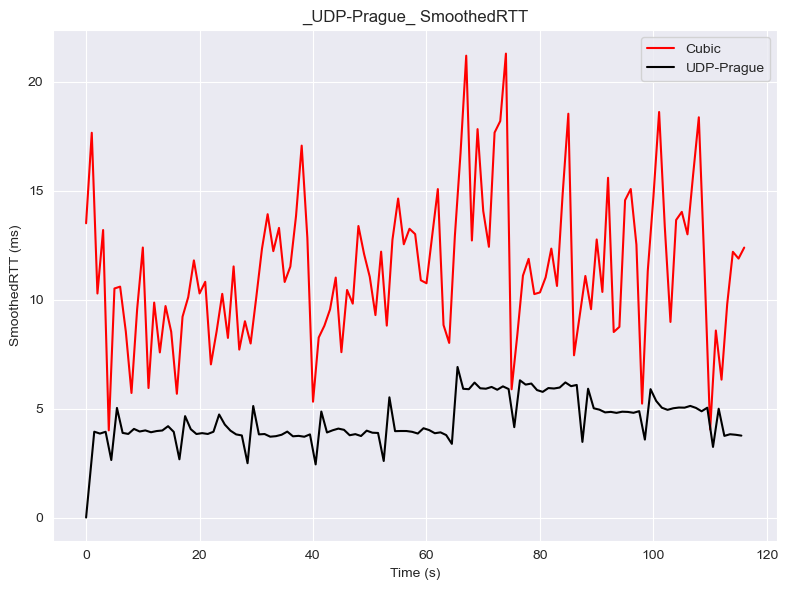

In [9]:
    # Define paths
paths = {
    "Cubic": tfcubic,
    "UDP-Prague": utf
}



scenario = str("_" + "UDP-Prague" + "_")

plot_siftr_graph(paths=paths,
                ycolumn="SmoothedRTT",
                title=f"{scenario} SmoothedRTT",
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'{scenario}_SmoothedRTT',
                graph_directory="./",
)